# Occupation and Health
### Exploring the effects of job title and overall sleep and physical healthiness
#### By Joshua Leung | 100925917
There are thousands of different occupations around the world, each greatly differing in their difficulty, level of physical activity, mental exertion, hours worked, and commitment required. I wanted to explore how those differences would affect a person's sleep health as well as their physical healthiness, if there was any difference at all. For example, a software engineer would likely spend most of their day sitting in front of a computer, while a nurse would be more hands on and active instead. Would they have different sleep durations between them? What about quality of sleep? Would they weigh differently? Sleep is one of the most important functions, so it is important that everyone gets a good sleep every night, as it can affect someone's entire body in terms of their health. In this assignment, I will utilise a dataset to examine the relationships between the sleep and lifestyle data of people and their occupation.


![Worker](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Capri_-_7224.jpg/1280px-Capri_-_7224.jpg "Cordwainer making shoes")
###### Image source: https://upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Capri_-_7224.jpg/1280px-Capri_-_7224.jpg

## Methods

### Collection of Data
Data obtained from [Kaggle](https://www.kaggle.com/datasets). [1]

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
data = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

### Data Cleaning

The data was pretty much clean already, though I did take some precautions just in case by attemping to remove any rows that contained missing data. I also cleaned up the names of some column elements, such as changing "Normal Weight" in BMI Category to "Normal" as they were both present to simplify things. I also removed the Heart Rate and Daily Steps columns as I didn't determine them to be too useful.

In [3]:
#Remove empty rows
data = data.dropna(axis=0)
#Replacing 'Normal Weight' with 'Normal'
data = data.replace({"BMI Category": {"Normal Weight": "Normal"}})
#Dropping columns
data = data.drop("Heart Rate", axis=1)
data = data.drop("Daily Steps", axis=1)

## Analyses
I will begin exploring how occupation and sleep health are connected.

### Columns Explanation
First of all, I'd like to explain some of the columns present in the data. The Sleep Duration column measures sleep in hours, the Quality of Sleep column measures it on a scale of 1 to 10, the Physical Activity Level measures it based on minutes active per day, and the Stress Level measures it based on a scale of 1 to 10. I think the rest should be self-explanatory.

### Occupation Distribution
The figure below displays the distribution of occupations within the dataset. The most common occupations were doctors, nurses, and engineers, while managers, sales representatives and software engineers were among the least common by far. With managers, sales representatives, software engineers and scientists only having 1, 2, 4 and 4 data entries each respectively, analysis wouldn't beget too useful information.

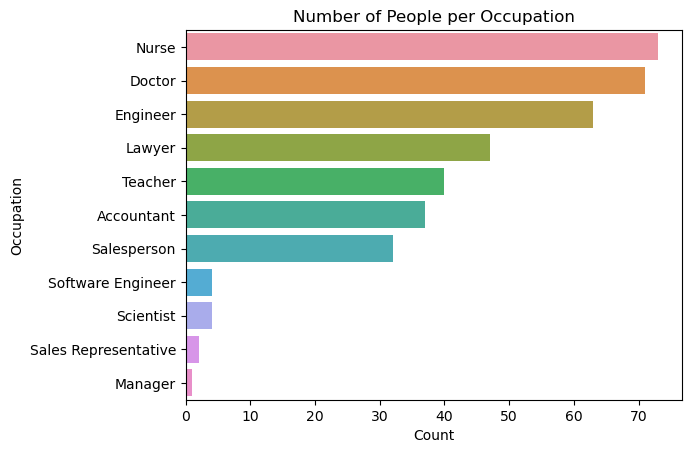

In [4]:
#Creating plot
occuPlot = sns.countplot(y = "Occupation", data = data, order = data["Occupation"].value_counts().index)
occuPlot = occuPlot.set(title = "Number of People per Occupation", ylabel = "Occupation", xlabel = "Count")

### Occupation and Sleep Duration
Below is a plot displaying the average sleep duration per occupation, with included error bars. We can see there are only slight differences between most of the occupations, with the highest average only being 2 hours more than the lowest average. The spread of the values is also quite small for most of them too, with the exception of software engineers.

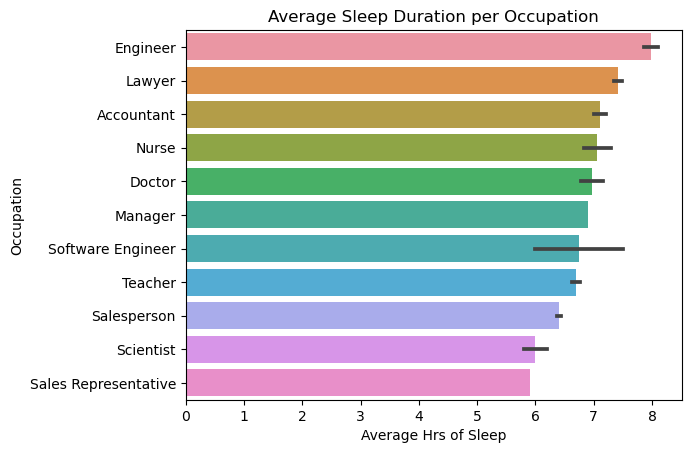

In [5]:
#Calculating data
sleepAvg = data.groupby("Occupation")["Sleep Duration"].mean().round(2)
#Create plot
ocuSleDurPlot = sns.barplot(x = "Sleep Duration", y = "Occupation", data = data, order = sleepAvg.sort_values(ascending=False).index)
ocuSleDurPlot = ocuSleDurPlot.set(title = "Average Sleep Duration per Occupation", ylabel = "Occupation", xlabel = "Average Hrs of Sleep")

### Occupation and Quality of Sleep
Analysing the relationship between occupation and average quality of sleep, we can see that there is quite a difference in averages between occupations. Engineers have the highest average quality of sleep, while salespersons have a much lower average in comparison. The spread of values isn't large for most of them, with the exception of software engineers and scientists.

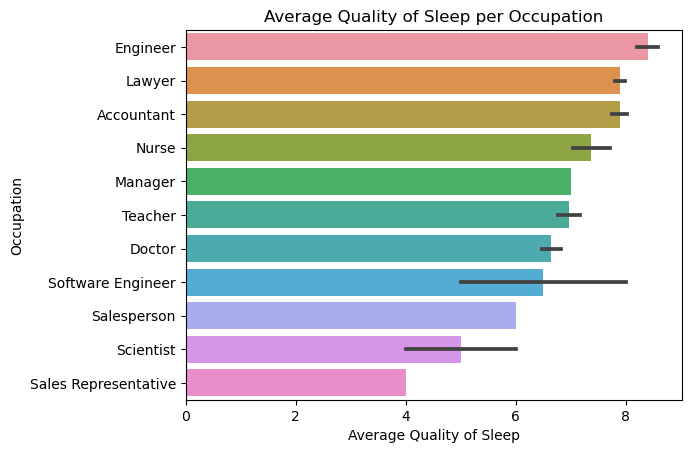

In [6]:
#Calculating data
qualAvg = data.groupby("Occupation")["Quality of Sleep"].mean()
#Create plot
ocuQualSlePlot = sns.barplot(x = "Quality of Sleep", y = "Occupation", data = data, order = qualAvg.sort_values(ascending=False).index)
ocuQualSlePlot = ocuQualSlePlot.set(title = "Average Quality of Sleep per Occupation", ylabel = "Occupation", xlabel = "Average Quality of Sleep")

### Occupation and Physical Activity Level
An analysis of average physical activity level for each occupation reveals large gaps between some of them. Nurses and lawyers have the highest by far, while the other occupations fall behind by 10 minutes or more.

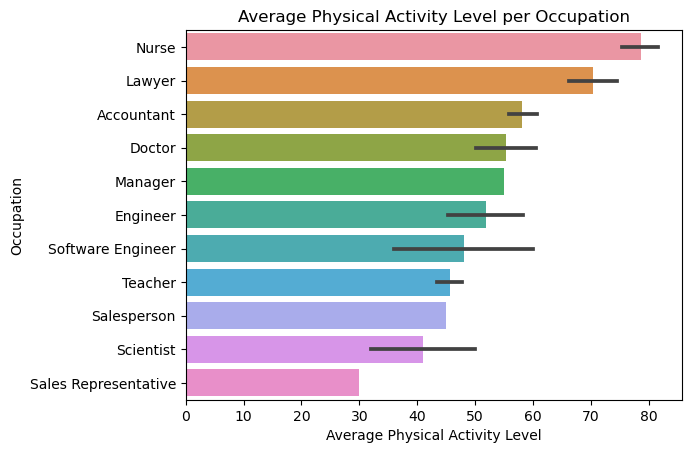

In [7]:
#Calculating data
physAvg = data.groupby("Occupation")["Physical Activity Level"].mean()
#Create plot
ocuPhysPlot = sns.barplot(x = "Physical Activity Level", y = "Occupation", data = data, order = physAvg.sort_values(ascending=False).index)
ocuPhysPlot = ocuPhysPlot.set(title = "Average Physical Activity Level per Occupation", ylabel = "Occupation", xlabel = "Average Physical Activity Level")

### Occupation and BMI Category
This table yields interesting results. For most occupations, being normal weighted was by far the most common BMI category. However, for nurses, salespersons, and teachers, being overweight far outweighed the volume of normal BMI categoried people.

In [8]:
#Creating table
ocuBMI = data.groupby(["Occupation", "BMI Category"]).size().unstack().fillna(0).astype(int)
display(ocuBMI)

BMI Category,Normal,Obese,Overweight
Occupation,,,
Accountant,31,0,6
Doctor,67,4,0
Engineer,60,0,3
Lawyer,43,2,2
Manager,0,0,1
Nurse,7,0,66
Sales Representative,0,2,0
Salesperson,0,0,32
Scientist,0,0,4


### Occupation and Sleep Disorder
For the table below displays a count of the number of sleep disorders per occupation. For most jobs, the majority of people had none. For nurses, salespersons, and teachers though, they all had a significantly larger amount of people with sleep disorders than people who didn't. Interestingly, sleep apnea was the most common for nurses, but imsomnia was the most common for salespersons and teachers.

In [9]:
#Creating table
ocuDis = data.groupby(["Occupation", "Sleep Disorder"]).size().unstack().fillna(0).astype(int)
display(ocuDis)

Sleep Disorder,Insomnia,None,Sleep Apnea
Occupation,,,
Accountant,7,30,0
Doctor,3,64,4
Engineer,5,57,1
Lawyer,2,42,3
Manager,0,1,0
Nurse,3,9,61
Sales Representative,0,0,2
Salesperson,29,2,1
Scientist,0,2,2


### Occupation and Blood Pressure
This table summarizes the average blood pressure for each occupation. The average blood pressure is between 90/60 and 120/80, which means that most occupations below are actually above that threshold.

In [10]:
#Splitting data into two categories
data[["Systolic", "Diastolic"]] = data["Blood Pressure"].str.split("/", expand=True)
data["Systolic"] = pd.to_numeric(data["Systolic"])
data["Diastolic"] = pd.to_numeric(data["Diastolic"])

#Displaying table
bloodpreAvg = data.groupby("Occupation")[["Systolic", "Diastolic"]].mean().round(2)
display(bloodpreAvg)

,Systolic,Diastolic
Occupation,,
Accountant,117.73,76.92
Doctor,123.00,80.51
Engineer,125.90,81.38
Lawyer,129.96,85.00
Manager,125.00,82.00
Nurse,138.52,93.73
Sales Representative,140.00,90.00
Salesperson,130.00,85.00
Scientist,129.50,85.50


## Supplementary Analyses

### Sleep Duration and Quality of Sleep
There is a heavy correlation between sleep duration and quality of sleep.

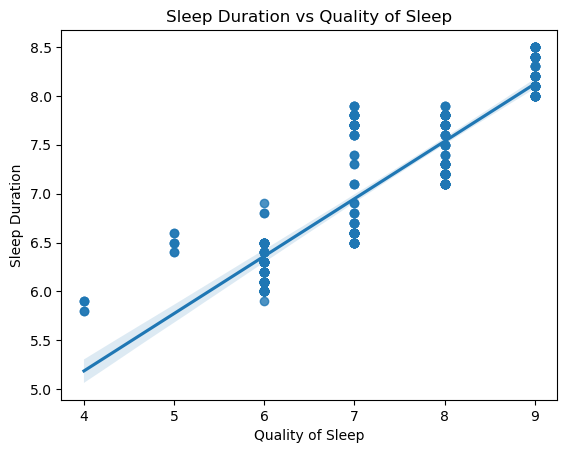

In [11]:
#Creating plot
qualDurplot = sns.regplot(data = data, x = "Quality of Sleep", y = "Sleep Duration")
qualDurplot = qualDurplot.set(title = "Sleep Duration vs Quality of Sleep", ylabel = "Sleep Duration", xlabel = "Quality of Sleep")

### Quality of Sleep and Physical Activity Level
There doesn't seem to be a relationship between quality of sleep and physical activity level. Comparing them, the physical activity amounts widely vary between each sleep quality level.

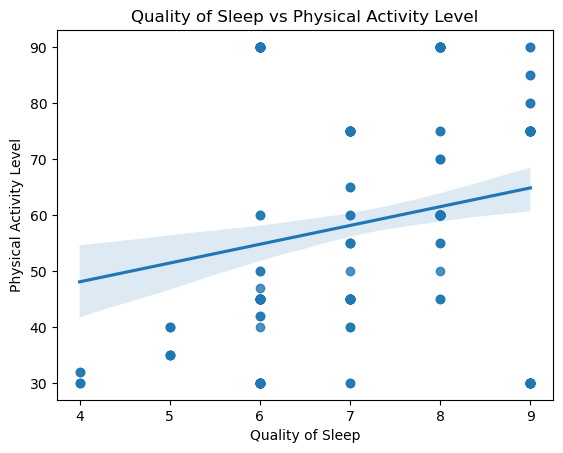

In [12]:
#Creating plot
qualPhysplot = sns.regplot(data = data, x = "Quality of Sleep", y = "Physical Activity Level")
qualPhysplot = qualPhysplot.set(title = "Quality of Sleep vs Physical Activity Level", ylabel = "Physical Activity Level", xlabel = "Quality of Sleep")

### Quality of Sleep and Stress Level
Quality of Sleep and Stress Level are heavily correlated. As stress level goes down, quality of sleep rises proportionally.

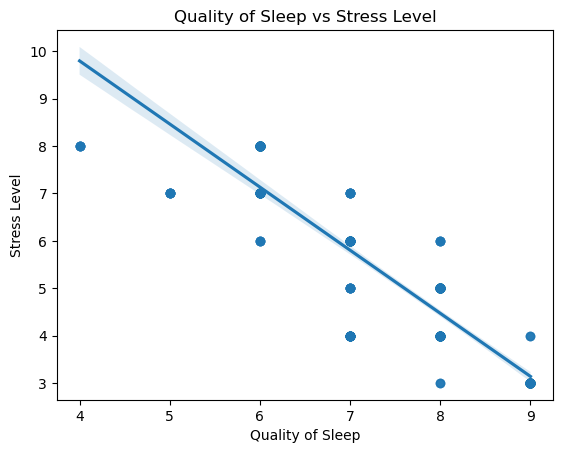

In [13]:
#Creating plot
qualStreplot = sns.regplot(data = data, x = "Quality of Sleep", y = "Stress Level")
qualStreplot = qualStreplot.set(title = "Quality of Sleep vs Stress Level", ylabel = "Stress Level", xlabel = "Quality of Sleep")

### BMI Category and Physical Activity Level
There doesn't seem to be any correlation between physical activity level and BMI category. The averages of each are all relatively the same between each BMI category.

In [14]:
#Calculating averages
BMIAvg = data.groupby("BMI Category")[["Physical Activity Level"]].mean().round(2)
#Creating plot
display(BMIAvg)

,Physical Activity Level
BMI Category,
Normal,57.95
Obese,55.00
Overweight,61.24


### Sleep Disorder and Sleep Duration
There seems to be a weak correlation between sleep disorder and sleep duration. The average for no sleep disorder is higher than the averages with sleep disorders, but by a small amount.

In [15]:
#Calculating average
disDurAvg = data.groupby("Sleep Disorder")[["Sleep Duration"]].mean().round(2)
display(disDurAvg)

,Sleep Duration
Sleep Disorder,
Insomnia,6.59
None,7.36
Sleep Apnea,7.03


### Sleep Disorder and Quality of Sleep
There also seems to be a somewhat weak correlation between sleep disorder and quality of sleep. The averages aren't too far apart for each category.

In [16]:
#Creating table
disQualAvg = data.groupby("Sleep Disorder")[["Quality of Sleep"]].mean().round(2)
display(disQualAvg)

,Quality of Sleep
Sleep Disorder,
Insomnia,6.53
None,7.63
Sleep Apnea,7.21


## Discussion
Below is a summary table of all the relevant numerical averages from each column in the data.

In this analysis, I examined data from a sleep health dataset and focused on the relationship between occupation and overall sleep health. Through my exploring, I have found a relationship between them. Firstly, I found that engineers have a considerably higher sleep duration and quality of sleep compared to the rest of the occupations. I have also found that nurses have the highest average minutes of physical activity per day, but despite that they have a large amount of overweight people and people suffering from sleep disorders. This also applies to salespersons and teachers. Nurses also have the highest average blood pressure compared to other jobs, though most occupations have a higher blood pressure than average. These results prove there is a relationship between occupation and sleep health, though sleeping well does not necessarily mean they will be fully healthy physically.

In [17]:
#Calculating averages for each column
summary = data.groupby("Occupation")[["Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Systolic", "Diastolic"]].mean().round(2)
summary.insert(0, "Count", data.groupby("Occupation").size(), True)
display(summary)

,Count,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Systolic,Diastolic
Occupation,,,,,,,
Accountant,37,7.11,7.89,58.11,4.59,117.73,76.92
Doctor,71,6.97,6.65,55.35,6.73,123.00,80.51
Engineer,63,7.99,8.41,51.86,3.89,125.90,81.38
Lawyer,47,7.41,7.89,70.43,5.06,129.96,85.00
Manager,1,6.90,7.00,55.00,5.00,125.00,82.00
Nurse,73,7.06,7.37,78.59,5.55,138.52,93.73
Sales Representative,2,5.90,4.00,30.00,8.00,140.00,90.00
Salesperson,32,6.40,6.00,45.00,7.00,130.00,85.00
Scientist,4,6.00,5.00,41.00,7.00,129.50,85.50


## References
[1] https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

[2] Pandas data analysis

[3] Matplotlib data visualization

[4] Seaborn data visualization